### Easy

Нужно посмотреть, по каким переменным имеет смысл объединять пользователей в группы (например, используя `sns.pairplot`). Можно взять все признаки. Провести кластеризацию, подобрав количество кластеров "на глаз".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data/credit_card.csv')
df = df.dropna()
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0,3,11000.0,1164.770591,100.302262,0.000000,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.00,0,12,1200.0,1083.301007,2172.697765,0.000000,12


In [3]:
df.shape

(8636, 18)

In [4]:
df = (df - df.mean()) / df.std()

In [5]:
df

,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,CUST_ID,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE
0,-0.744582,-0.370025,-0.468628,-0.681913,-0.479409,-0.962520,NaN,-0.354805,-0.305490,-0.359139,-0.686240,-0.543910,-0.537696,-0.429159,-0.820721,-0.717137,-0.517593,0.355160
1,0.764108,0.067675,2.568408,0.556990,0.099252,0.677165,NaN,-0.458812,0.087684,-0.359139,-0.686240,0.796806,0.212368,-0.473181,-1.236067,-0.926468,-0.597020,0.355160
2,0.426578,0.505375,-0.468628,-0.681913,-0.479409,0.813805,NaN,-0.458812,-0.099900,0.099904,2.646498,-0.399480,-0.537696,-0.116406,1.256004,-0.926468,-0.120460,0.355160
4,-0.373889,0.505375,-0.468628,-0.681913,-0.479409,-0.907864,NaN,-0.458812,-0.261115,-0.349640,-0.408513,-0.380143,-0.537696,-0.465798,-1.028396,-0.926468,-0.557306,0.355160
5,0.099545,0.505375,-0.468628,-0.681913,-0.479409,-0.743895,NaN,0.994757,0.650326,-0.359139,-0.686240,-0.132112,-0.537696,0.142054,0.425314,0.538851,-0.279313,0.355160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,-0.761297,-1.901979,-0.468628,-0.681913,-0.479409,-1.099160,NaN,-0.458812,-0.345968,-0.346731,-0.130782,-0.593109,-0.537696,-0.463537,-0.820721,-0.926468,-0.557306,-4.221556
8945,-0.750502,0.505375,-0.468628,-0.681913,-0.479409,-0.962520,NaN,-0.141427,-0.343686,-0.359139,-0.686240,-0.501367,1.149949,-0.338845,1.256004,1.166845,-0.358740,-4.221556
8947,-0.752934,-0.297078,-0.468628,-0.681913,-0.479409,-0.962520,NaN,-0.301385,-0.329553,-0.359139,-0.686240,-0.585333,0.306126,-0.406548,0.840658,0.748184,-0.398453,-4.221556
8948,-0.757678,-0.297078,-0.451396,0.144024,-0.190078,-1.099160,NaN,-0.458812,-0.340791,-0.359139,-0.686240,-0.595203,0.306126,-0.473181,-1.236067,-0.926468,-0.597020,-4.221556


In [17]:
df_1 = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']]

In [18]:
df_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,-0.744582,-0.370025,-0.429159,-0.543910,-0.359139,-0.686240,-0.717137
1,0.764108,0.067675,-0.473181,0.796806,-0.359139,-0.686240,-0.926468
2,0.426578,0.505375,-0.116406,-0.399480,0.099904,2.646498,-0.926468
4,-0.373889,0.505375,-0.465798,-0.380143,-0.349640,-0.408513,-0.926468
5,0.099545,0.505375,0.142054,-0.132112,-0.359139,-0.686240,0.538851
...,...,...,...,...,...,...,...
8943,-0.761297,-1.901979,-0.463537,-0.593109,-0.346731,-0.130782,-0.926468
8945,-0.750502,0.505375,-0.338845,-0.501367,-0.359139,-0.686240,1.166845
8947,-0.752934,-0.297078,-0.406548,-0.585333,-0.359139,-0.686240,0.748184
8948,-0.757678,-0.297078,-0.473181,-0.595203,-0.359139,-0.686240,-0.926468


In [34]:
n = 4
model = KMeans(n)


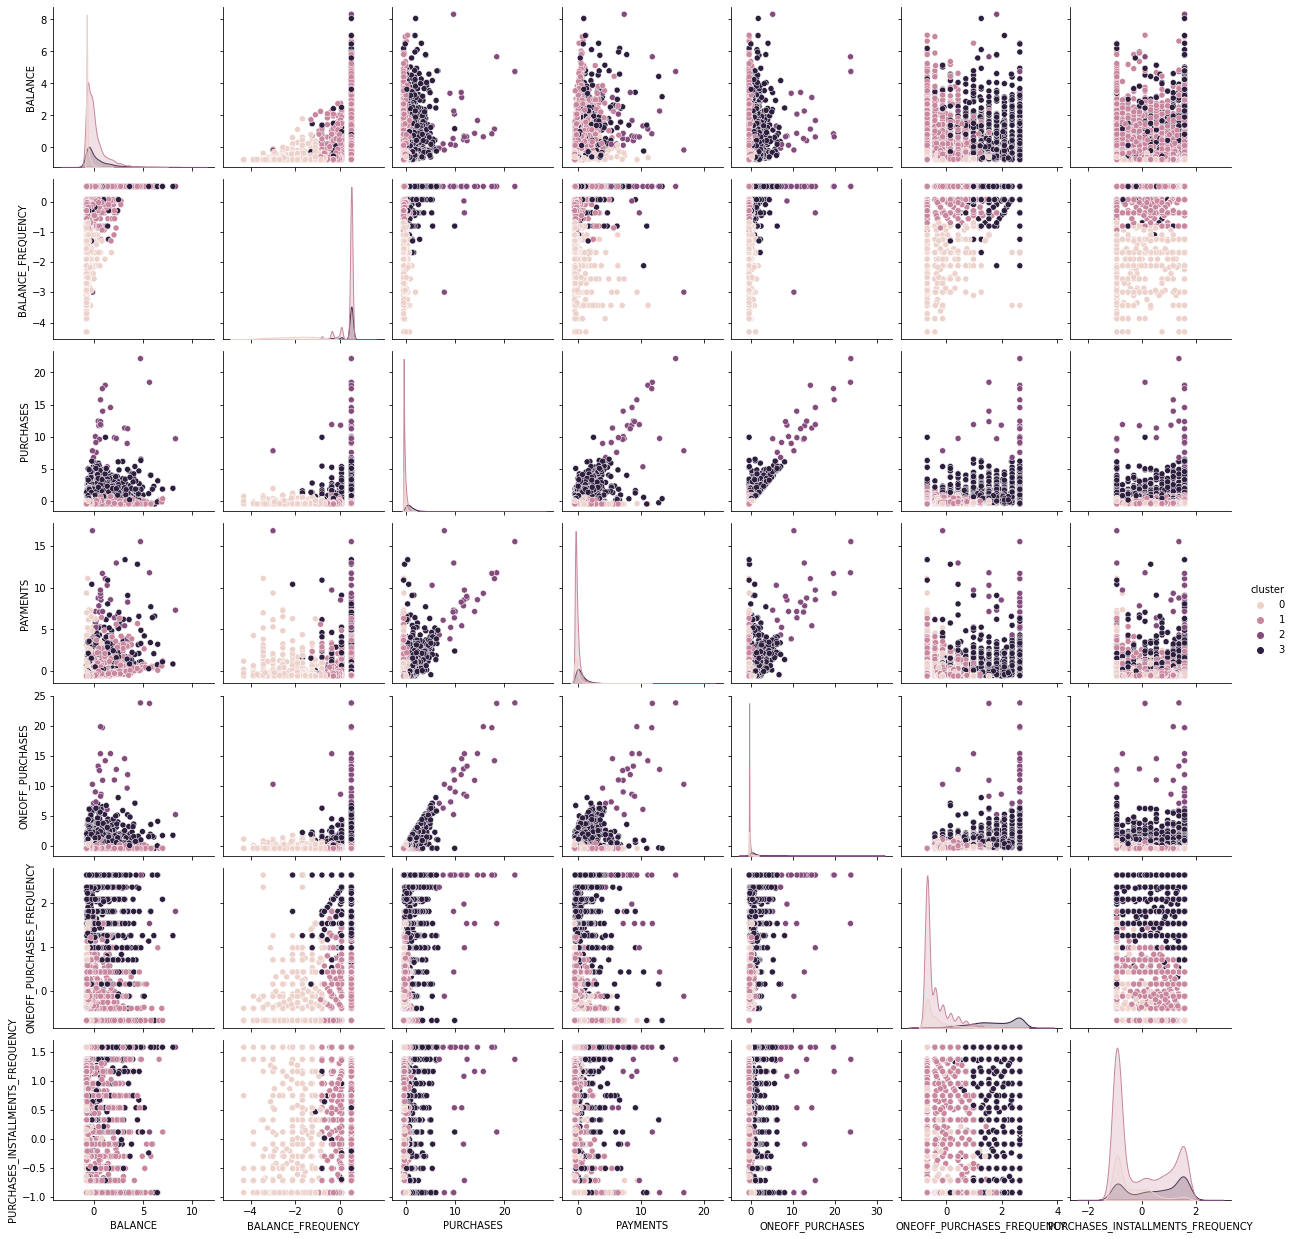

In [35]:
sns.pairplot(df_1, hue='cluster')

Количество класстеров, подобранных "на глаз" - 4.


### Normal

Определить количество кластеров при помощи метода Elbow.


In [36]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

Text(0.5, 1.0, 'Elbow method')

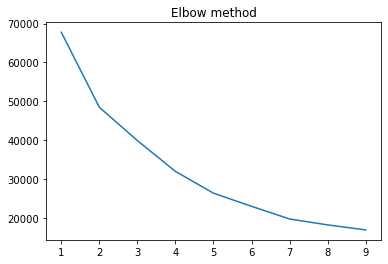

In [37]:
distances = [distance_by_n(df_1, n) for n in range(1, 10)]
plt.plot(range(1, 10), distances)
plt.title('Elbow method')

Из графика видно, что можно взять число кластеров в интервале [4, 6]. Посмотрим, какое кол-во кластеров показут другие методы

Определим кол-во кластеров с помощью дендрограммы (иерархическая кластеризация)

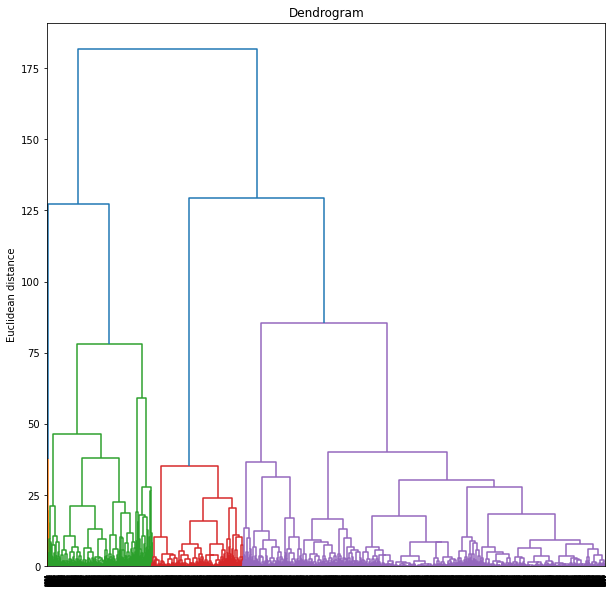

In [12]:
Z = linkage(df_1, method = 'ward')

#plotting dendrogram
plt.figure(figsize=(10, 10))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Я бы выбрала 4 кластера, а не 3 (как показывает дендрограмма), т.к. видно, что дальше большое расстояние между кластерами.

Вывести график с разделением на группы в координатах `BALANCE`-`PURCHASES` и `BALANCE`-`PURCHASER_INSTALLMENTS_FREQUENCY`. Видны ли какие-то закономерности?

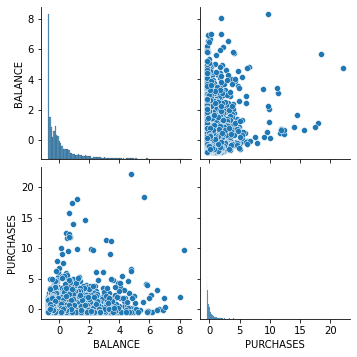

In [38]:
sns.pairplot(df_1[['BALANCE', 'PURCHASES']])

Основная масса при любом балансе осуществляет покупки до определенной величины.

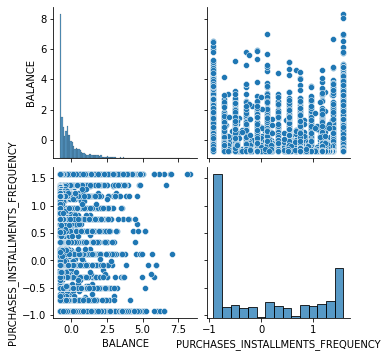

In [39]:
sns.pairplot(df_1[['BALANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY']])

Есть отдельные группы, которые осуществляют одиннаковое число покупок при любом балансе.

### Hard

Посмотреть зависимости между другими признаками и попробовать проинтерпретировать какие-то кластеры.

Посмотрим по кластерам средние наблюдения